(21, 21) float32
-3.7951716e-06
3.9807248e-05
0.00019030055
0.0005060175
0.00088889705
0.0008878138
-0.0002732525
-0.0031262112
-0.007024554
-0.009795353
-0.008912018
-0.0036808455
0.0036133125
0.009111007
0.010272339
0.007547553
0.0034517904
0.0003343306
-0.0009926044
-0.0010247197
-0.0005978621
3.9761802e-05
0.00020486234
0.0005868766
0.0011106821
0.0011955233
-0.00039383757
-0.004876388
-0.011806487
-0.017736651
-0.01738621
-0.0077429265
0.0081612095
0.022190282
0.026955318
0.021336868
0.010514491
0.0011016118
-0.003502357
-0.003896663
-0.0024493253
-0.0010171584
0.00019011497
0.00058675953
0.0011963553
0.0013877971
-0.0004893161
-0.006557074
-0.017106246
-0.027685683
-0.029239222
-0.014040862
0.01589039
0.046589848
0.060974978
0.05199807
0.02760985
0.0031289798
-0.010653109
-0.012773581
-0.008650157
-0.0038701214
-0.0009701303
0.00050571474
0.0011108684
0.001388755
-0.00052406004
-0.0076007047
-0.021365883
-0.037253834
-0.042389546
-0.021948937
0.026671385
0.084324114
0.11890248
0.

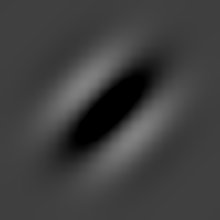

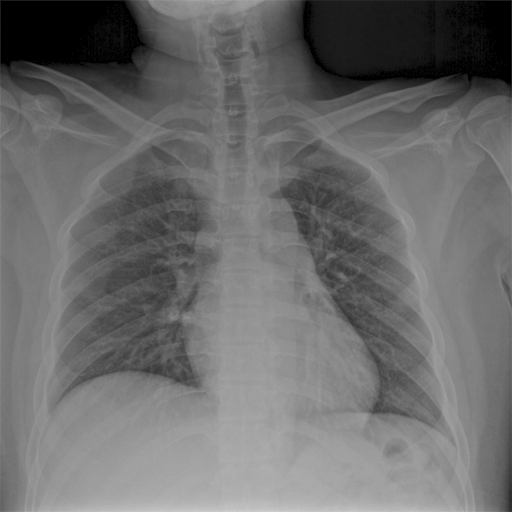

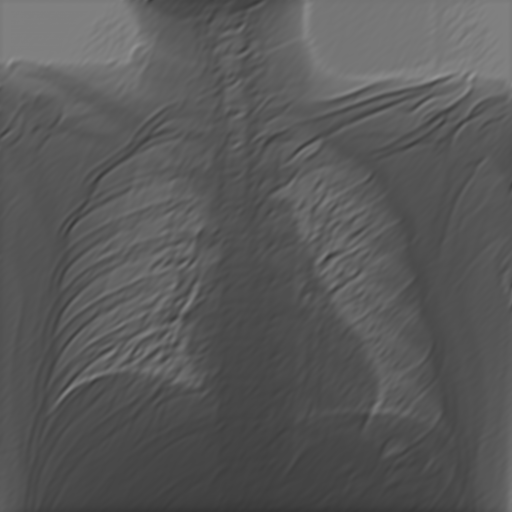

In [20]:

#-*- coding: utf-8 -*- -#
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# gabor filter
kernel = cv2.getGaborKernel(
    (21,21), # Size of filter
    3.12,   # Standard deviation of the gaussian envelope
    3.14/4, # Orientation of the normal to the parallel stripes of a Gabor function
    8,      # Wavelength of the sinusoidal factor
    0.85,   # Spatial aspect ratio
    3.14,   # Phase offset
    ktype=cv2.CV_32F    # Type of filter coefficients
)

print (kernel.shape, kernel.dtype)

for y in range(0, kernel.shape[0]):
    for x in range(0, kernel.shape[1]) :
        print (kernel[y,x])

# Gabor 필터 보기
dst = cv2.resize(kernel, (220,220), interpolation = cv2.INTER_CUBIC)
dst = dst+0.5   # 음수 값을 필터 계수를 나타내기 위해 0.5 더한다
cv2_imshow(128*dst)

image=cv2.imread("/content/drive/MyDrive/python/data/의료영상데이타/chest.bmp", cv2.IMREAD_GRAYSCALE)

dst = cv2.filter2D(
    image,          # 입력영상
    cv2.CV_32FC1,   # 결과데이터 타입
    kernel          # 필터
)

# display를 위해 float 형 영상을 unsigned int 8 bit 로 변경
u_img = np.uint8(dst/10 + 128)

cv2_imshow(image)
cv2_imshow(u_img)
# cv2.waitKey(0)
